# Face Verification: One-to-One Face Comparison

This notebook demonstrates how to verify if two face images belong to the same person using **UniFace**.

## 1. Install UniFace

In [1]:
%pip install -q uniface

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import matplotlib.pyplot as plt

import uniface
from uniface import FaceAnalyzer
from uniface.detection import RetinaFace
from uniface.recognition import ArcFace

print(uniface.__version__)

2.0.0


## 3. Initialize Face Analyzer
We need detection and recognition models for face verification.



In [3]:
analyzer = FaceAnalyzer(
    detector=RetinaFace(confidence_threshold=0.5),
    recognizer=ArcFace()
)

✓ Model loaded (CoreML (Apple Silicon))
✓ Model loaded (CoreML (Apple Silicon))


In [4]:
image_path1 = '../assets/test_images/image0.jpg'
image_path2 = '../assets/test_images/image1.jpg'

image1 = cv2.imread(image_path1)
image2 = cv2.imread(image_path2)

# Analyze faces
faces1 = analyzer.analyze(image1)
faces2 = analyzer.analyze(image2)

print(f'Detected {len(faces1)} and {len(faces2)} faces')

Detected 1 and 1 faces


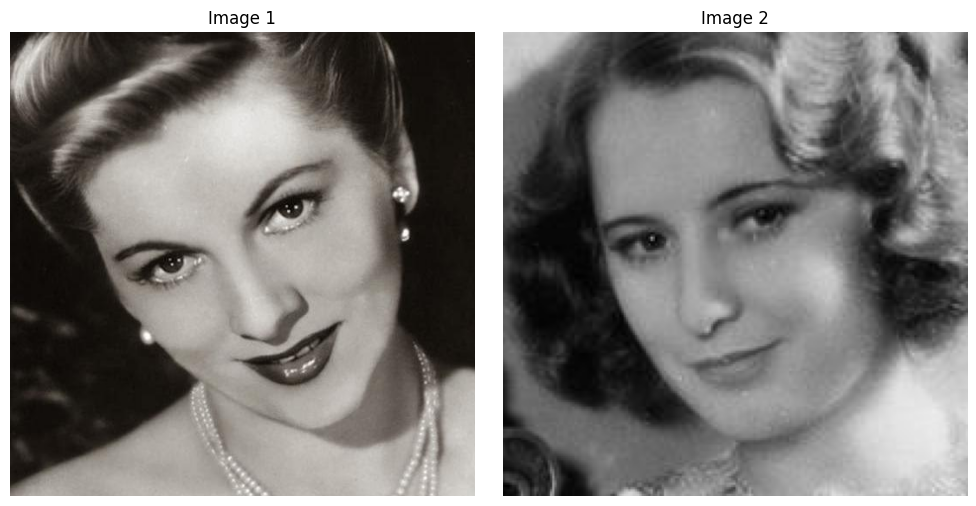

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[0].set_title('Image 1')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[1].set_title('Image 2')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [6]:
if faces1 and faces2:
    face1 = faces1[0]
    face2 = faces2[0]

    similarity = face1.compute_similarity(face2)
    print(f'Similarity: {similarity:.4f}')
else:
    print('Error: Could not detect faces')

Similarity: 0.1135


In [7]:
THRESHOLD = 0.6

if faces1 and faces2:
    is_same_person = similarity > THRESHOLD

    print(f'Similarity: {similarity:.4f}')
    print(f'Threshold: {THRESHOLD}')
    print(f'Result: {"Same person" if is_same_person else "Different people"}')

Similarity: 0.1135
Threshold: 0.6
Result: Different people


In [8]:
image_pairs = [
    ('../assets/test_images/image0.jpg', '../assets/test_images/image1.jpg'),
    ('../assets/test_images/image0.jpg', '../assets/test_images/image2.jpg'),
    ('../assets/test_images/image1.jpg', '../assets/test_images/image2.jpg'),
]

print('Comparing multiple pairs:')
for img1_path, img2_path in image_pairs:
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)

    faces_a = analyzer.analyze(img1)
    faces_b = analyzer.analyze(img2)

    if faces_a and faces_b:
        sim = faces_a[0].compute_similarity(faces_b[0])

        img1_name = img1_path.split('/')[-1]
        img2_name = img2_path.split('/')[-1]

        print(f'{img1_name} vs {img2_name}: {sim:.4f}')

Comparing multiple pairs:
image0.jpg vs image1.jpg: 0.1135
image0.jpg vs image2.jpg: 0.0833
image1.jpg vs image2.jpg: -0.0082



## Notes

- Similarity score ranges from -1 to 1 (higher = more similar)
- Threshold of 0.6 is commonly used (above = same person, below = different)
- Adjust threshold based on your use case (higher = stricter matching)